## 0. Environment setup for this notebook

In [1]:
%matplotlib inline
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import h5py

/Users/dalin/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


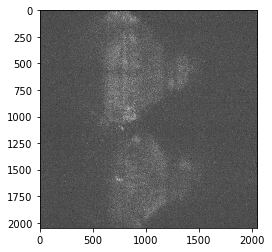

In [14]:
h5f = h5py.File('/Users/dalin/Desktop/TM0000000_CM0_CHN00.h5', 'r')
imgStack = h5f['default'] # z, x, y
plt.imshow(imgStack[0], cmap='gray')

## 1. Preprocessing of raw imaging

From image stack to volumetric data

### 1.0 Set up parallel processing on local or remote machine

### 1.1 Pixel-wise denoising (optional)
The algorithm is based on NCS (noise correction algorithm for sCMOS (scientific CMOS) cameras) at https://github.com/HuanglabPurdue/NCS

The reference paper is as follow:
https://www.nature.com/articles/nmeth.4379

The basic processing diagram is shown as follow:
![](pixelwiseDenoising/nmeth.4379-S1.jpg)

Some constants and reference image should be provided as follow:
* NA: numerical aperture of the objective
* $\lambda$: emission wavelength
* $\alpha$: weight factor of noise contribution

To develop a generalized noise-correction algorithm, authors exploited the common property of microscopy images, the optical transfer function (OTF). The amplitude of the OTF, defined by the microscope's numerical aperture and the wavelength of detection, dictates the frequency-response limit of a microscope system. Here one can specify the optical transfer function filter is defined using parameters like filter type (default is OTFweighted), w and h. OTF results in a filter (noise masks above) with two parameters $\beta$ and $T$. By default,

$\beta = 1$, $T = \frac{\lambda}{4NA*1.4}$, 

or an adjustable version of it can be computed as 

$\beta = \pi/2*\frac{k_{max}/w_0-1}{\arccos(1-2*h)+\pi/2*(k_{max}/w_0-1)}$, $T = \frac{1-\beta}{2w_0}$, $w_0 = w*\frac{NA}{lambda}$


In [18]:
import time # performance test for single image
import pixelwiseDenoising.denoisetools as ncs

Rs = 8 # size of segmented image
imgsz # image size
Pixelsize = # pixel size
NA = 1.4 # numerical aperture of the objective
Lambda = 0.7 # emission wavelength
alpha = 0.1 # weight factor of noise contribution
iterationN = 15 # number of iterations

In [ ]:
%%timeit
varsub,gainsub = gennoisemap(R,fpath)
# optical transfer function filter is defined using filter type (default is OTFweighted), w and h
out = ncs.reducenoise(Rs, imgStack[0],varsub,gainsub,imgsz,Pixelsize,NA,Lambda,alpha,iterationN,Type='OTFweighted',w=1,h=0.7)

### 1.2 

## 2. Image registration

### 2.0 Regitration to a single fish

### 2.1 Registration to multiple fish

### 2.2 Registration to brain atlas

## 3. 